In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn import metrics
from PIL import Image
warnings.filterwarnings("ignore")
os.chdir("D:/Ebac/Trabajos Cientifico de Datos")
df = pd.read_csv("Heart Attack.csv")

In [38]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
df = df.dropna()

X = df.drop(columns=['output'])
y = df['output']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Exactitud: 0.85
Precisión: 0.87
Recall: 0.84
F1 Score: 0.86


In [43]:
X = df.drop(columns=['output'])
y = df['output']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'exng']
numeric_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Exactitud: {accuracy:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Exactitud: 0.90
Precisión: 0.93
Recall: 0.88
F1 Score: 0.90


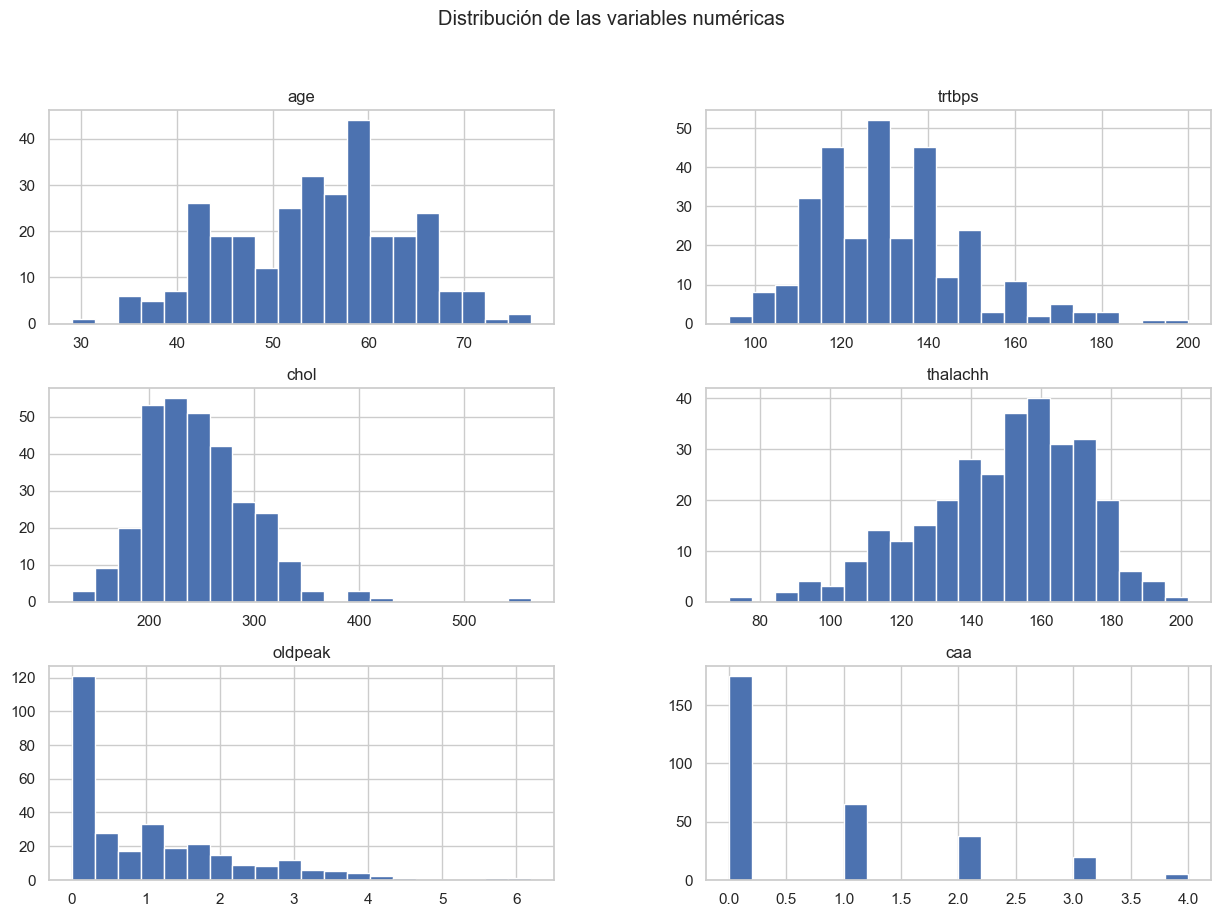

In [45]:
sns.set(style="whitegrid")

df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de las variables numéricas')
plt.show()

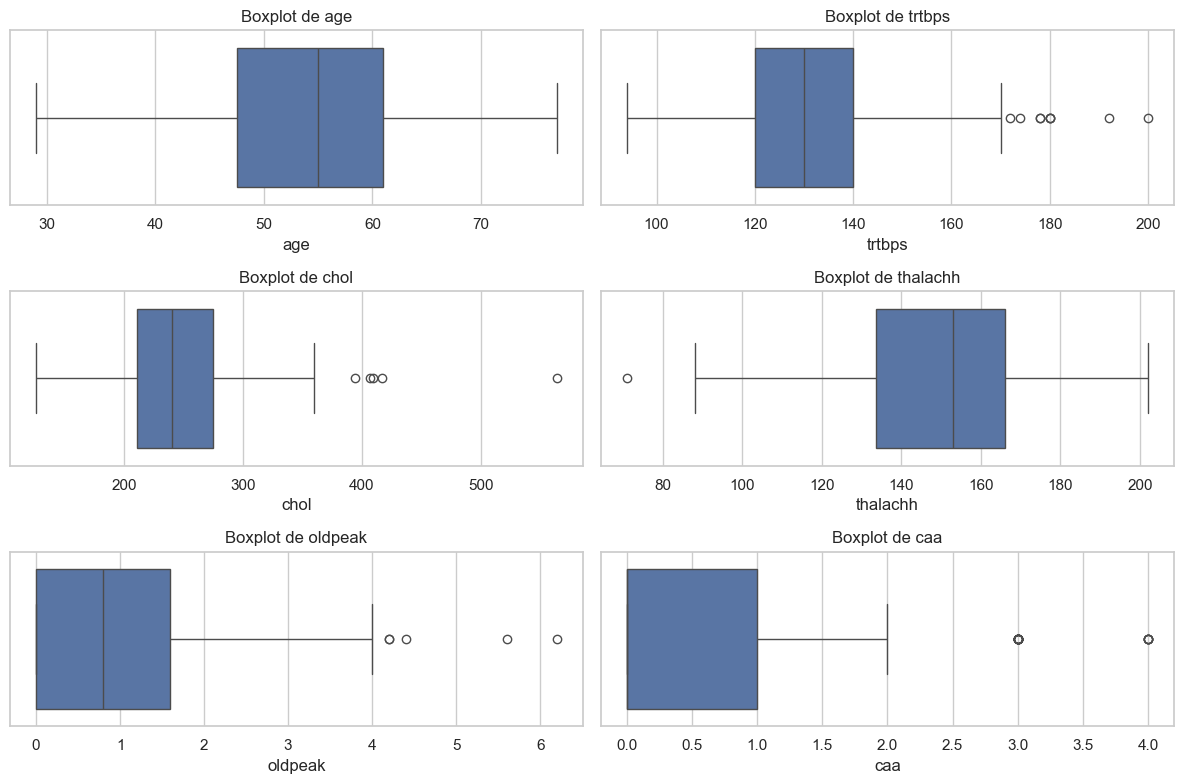

In [47]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

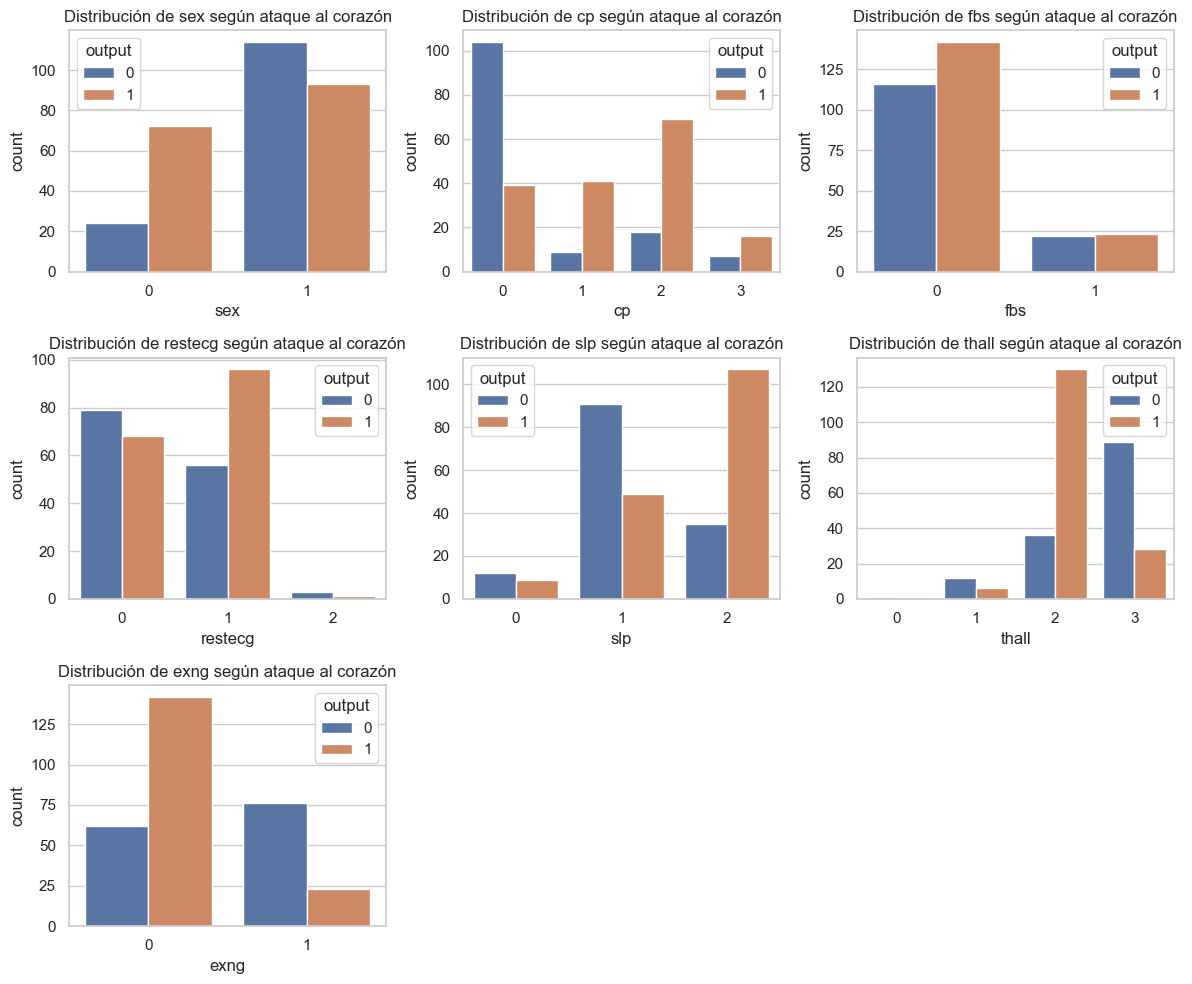

In [49]:
plt.figure(figsize=(12, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], hue=df['output'])
    plt.title(f'Distribución de {col} según ataque al corazón')
plt.tight_layout()
plt.show()

In [51]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print("Outliers detectados en cada variable numérica:")
print(outliers)

Outliers detectados en cada variable numérica:
age          0
trtbps       9
chol         5
thalachh     1
oldpeak      5
caa         25
dtype: int64


In [53]:
X = df.drop(columns=['output'])
y = df['output']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'exng']
numeric_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy:.2f}')

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))



Exactitud: 0.89
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



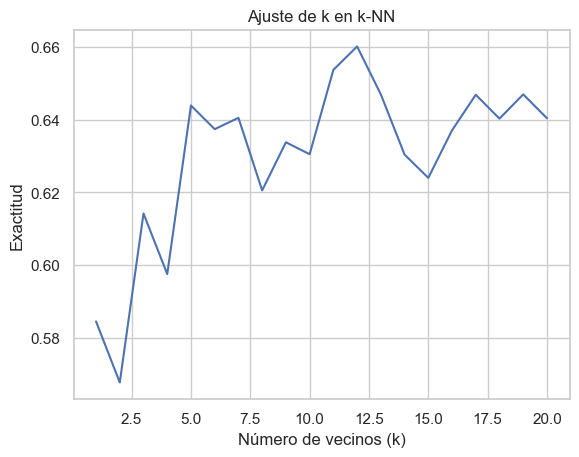

In [55]:
k_range = range(1, 21)
scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    scores.append(score.mean())

plt.plot(k_range, scores)
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Exactitud')
plt.title('Ajuste de k en k-NN')
plt.show()
k_range = range(1, 21)
scores = []

In [61]:
X = df.drop(columns=['output'])
y = df['output']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo k-NN con 6 vecinos: {accuracy:.2f}')

Exactitud del modelo k-NN con 6 vecinos: 0.93


In [63]:
nueva_observacion = np.array([[50, 1, 1, 140, 240, 0, 1, 150, 1.5, 2, 0, 2, 0]])

nueva_observacion_scaled = scaler.transform(nueva_observacion)

prediccion = knn.predict(nueva_observacion_scaled)

if prediccion == 1:
    print("La predicción indica que el paciente tiene un alto riesgo de sufrir un ataque al corazón.")
else:
    print("La predicción indica que el paciente no tiene un alto riesgo de sufrir un ataque al corazón.")

La predicción indica que el paciente no tiene un alto riesgo de sufrir un ataque al corazón.


In [200]:
df = pd.read_csv("MNIST.csv")

In [201]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
cols = [col for col in df.columns if 'pixel' in col]

print(cols[:10])

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9']


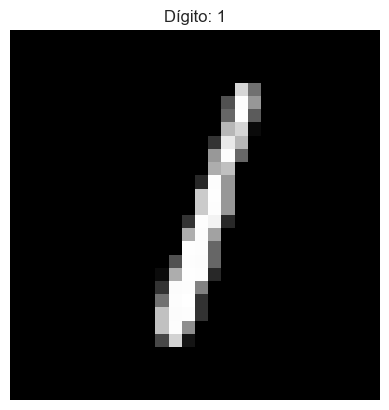

In [206]:
X = df.drop('label', axis=1)
y = df['label']

random_index = np.random.randint(0, len(X))
random_digit = X.iloc[random_index].values
digit_label = y.iloc[random_index]

random_digit_image = random_digit.reshape(28, 28)

plt.imshow(random_digit_image, cmap='gray')
plt.title(f'Dígito: {digit_label}') 
plt.axis('off')
plt.show()

In [208]:
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'La precisión del modelo k-NN es: {accuracy:.4f}')

La precisión del modelo k-NN es: 0.9667


In [209]:
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'La precisión del modelo k-NN con 14 vecinos es: {accuracy:.4f}')

La precisión del modelo k-NN con 14 vecinos es: 0.9567


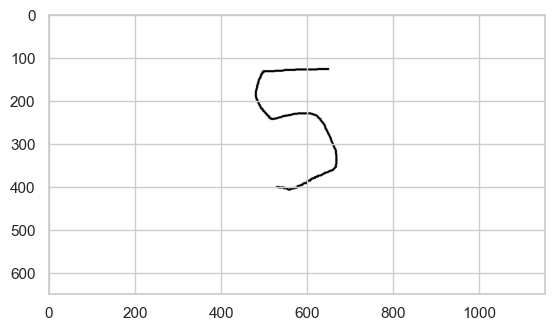

In [238]:
imagen = plt.imread("Imagen.jpg")
plt.imshow(imagen)

In [248]:
imagen = imagen.convert('L')

imagen = imagen.resize((28, 28))

imagen_array = np.array(imagen)

imagen_array = imagen_array / 255.0

imagen_array_flat = imagen_array.flatten()

imagen_array_flat = imagen_array_flat.reshape(1, -1)

prediccion = knn.predict(imagen_array_flat)
print(f'La predicción para la imagen cargada es: {prediccion[0]}')

La predicción para la imagen cargada es: 1
